# Aplicaçã de regressão linear em multipla, onde relaciona todas as colunas com a coluna alvo para uma melhor previsão

## Dataset Utilizada é o de alugueis de bicicletaas, disponibilizado pela Azure

### Objetivo: Realizar um modelo que melhor preve as vendas de bicicletas dado alguns dados de entrada

In [297]:
### Inicialmente importar as bibliotecas que serão utilizadas
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import json as js

# existe o lightgbm mas n vou trabalahr com ele ainda


In [298]:
# Subir os dados como dataframe
df_regression = pd.read_csv('daily-bike-share.csv').reset_index(drop=True)
df_regression

,day,mnth,year,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27,12,2012,1,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,28,12,2012,1,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,29,12,2012,1,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,30,12,2012,1,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


In [299]:
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   day         731 non-null    int64  
 1   mnth        731 non-null    int64  
 2   year        731 non-null    int64  
 3   season      731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  rentals     731 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.4 KB


In [300]:
df_regression.columns

Index(['day', 'mnth', 'year', 'season', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'rentals'],
      dtype='object')

In [301]:
# Para pegar os valores de uma coluna dos dados é só colocar ela como metodo do dataframe
df_regression.rentals

0      331
1      131
2      120
3      108
4       82
      ... 
726    247
727    644
728    159
729    364
730    439
Name: rentals, Length: 731, dtype: int64

In [302]:
# Como eu quero prever os meus alugueis então ele será o meu y
y = df_regressiony = df_regression.rentals
x = df_regression[[colunas for colunas in df_regression.columns if colunas != 'rentals']]

In [303]:
x

,day,mnth,year,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,2,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2,3,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,4,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
4,5,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900
...,...,...,...,...,...,...,...,...,...,...,...,...
726,27,12,2012,1,0,4,1,2,0.254167,0.226642,0.652917,0.350133
727,28,12,2012,1,0,5,1,2,0.253333,0.255046,0.590000,0.155471
728,29,12,2012,1,0,6,0,2,0.253333,0.242400,0.752917,0.124383
729,30,12,2012,1,0,0,0,1,0.255833,0.231700,0.483333,0.350754


Diretrizes Comuns para Definir o test_size

    Proporção Comum:
        70% para treinamento e 30% para teste: É uma divisão muito comum.
        80% para treinamento e 20% para teste: Também é bastante utilizada, especialmente se você tem muitos dados.
        60% para treinamento e 40% para teste: Às vezes usada em contextos onde se deseja mais dados para avaliar o modelo, mas pode ser menos precisa para o treinamento, especialmente em datasets menores.

    Considerações Baseadas no Tamanho dos Dados:
        Datasets pequenos: Se você tiver poucos dados, a maior parte deles deve ser usada para treinamento para garantir que o modelo aprenda o máximo possível. Por exemplo, uma divisão 80-20 ou 90-10 pode ser mais apropriada.
        Datasets grandes: Para grandes volumes de dados, uma divisão menor, como 70-30 ou até 60-40, pode ser suficiente, já que você tem muitos dados para treino e avaliação.
        

Muito Pouco Dado

    Características:
        Tamanho: Pouquíssimos exemplos, geralmente menos de 100 amostras.
        Estratégia: Pode ser necessário usar técnicas de aumento de dados (data augmentation) ou modelos simples, além de considerar validação cruzada para melhor aproveitar os poucos dados disponíveis.

Pouco Dado

    Características:
        Tamanho: Entre 100 e menos que 1000
        Estratégia: Considerar o uso de modelos mais simples ou técnicas de regularização (como L2, dropout). Também é importante avaliar a qualidade dos dados.

Médio Dado

    Características:
        Tamanho: 1000 e menos que 1000000
        Estratégia: Modelos mais complexos começam a ser viáveis, mas ainda é importante ter um bom processo de validação e balanceamento de dados.
Muito Dado

    Características:
        Tamanho: Acima de 1000000
        Estratégia: Pode-se aplicar técnicas avançadas, como deep learning, modelos de ensemble, ou validação cruzada para garantir a qualidade do modelo.

In [304]:
# Train_test_split é uma função que separa os dados entre dados de teste e dados e treinamento,
# test_size é a quantidade de dados que serão alocados para teste e de maneira inversa para o treinamento,
# ou seja, e está com 0.4 quer dizer que 40% dos dados são para teste e 60% para o treinamento
# o random_state=42 é arbitrario pela documentação, só garante a repordutividae do modelo, mas poderia ser qualquer
# numero inteiro diferente de 0, pois o 0 ou None resultararia uma divisão diferente a cada execução
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=42)

In [305]:
# Utilizar os dados de treino para gerar o modelo de regressão linear
model_regressaolinear = LinearRegression().fit(X_train,y_train)

In [306]:
# Utilzia o .values pos o x_tese retorna um panda series e eu preciso somente dos valores sem o indice, o 
# metodo pede que use o reshap(-1,1), sempre que tiver somente uma coluna de dados, mas no caso estou usando varias colunas

In [307]:
# Utilizar os dados de teste para validar o modelo
y_pred = model_regressaolinear.predict(X_test.values)

c:\Users\edens\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [308]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

244.0053023760226
104964.4961001609


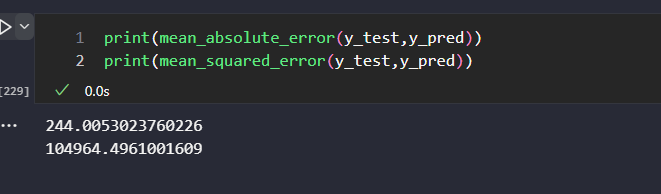


erro muito grande necessita de outro modelo


In [309]:
model_randomflorest = RandomForestRegressor(n_estimators=500, max_depth=15, min_samples_split=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
model_randomflorest.fit(X_train,y_train)
y_pred = model_randomflorest.predict(X_test)
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

194.73325034518646
84335.39046612915


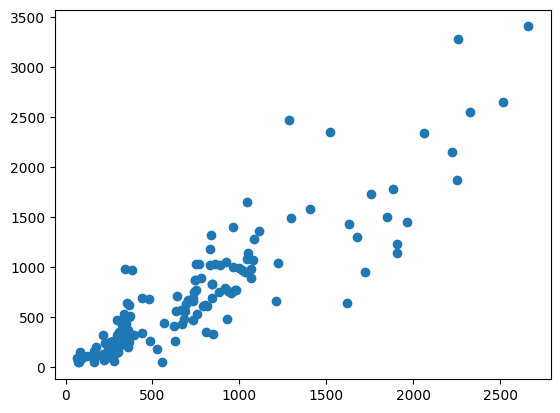

In [310]:
fig,ax = plt.subplots()

ax.scatter(y_pred,y_test)
plt.show()

In [311]:
df_regression.columns

Index(['day', 'mnth', 'year', 'season', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'rentals'],
      dtype='object')

## Para testar a previsão baseado em dados de entrada do usuario

In [312]:
# Primerio vamos criar o arquivo jason

file = open('dados_usuario.json', 'w+')

js.dump({colunas:0 for colunas in df_regression.columns if colunas != 'rentals'}, file, indent=2)
file.close()


## Agora para testar o arquivo, o programa deve ler o jason com as alterações do usuarios

In [313]:
file=open('dados_usuario.json','r+')
dados=js.load(file)
file.close()
print(dados)

{'day': 0, 'mnth': 0, 'year': 0, 'season': 0, 'holiday': 0, 'weekday': 0, 'workingday': 0, 'weathersit': 0, 'temp': 0, 'atemp': 0, 'hum': 0, 'windspeed': 0}


In [314]:
# Para o modelo ler os dados precisa ser um array 2D, ouseja uma matriz, então preciso transofrmar os valores em lista e depois essa lista
# em outra lista, para que vire uma matriz 1 x 3, onde será uma linha e 3 colunas e assim o modelo conseguir entender cada coluna,
# colocando os dados do tipo float e assim executando a previsão
dados_usuario = np.array([list(dados.values())]).astype(float)

In [315]:
y_pred_rl = model_regressaolinear.predict(dados_usuario)
y_pred_rf = model_randomflorest.predict(dados_usuario)
print(y_pred_rl, y_pred_rf)

[-599720.29504903] [210.15097294]


c:\Users\edens\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\edens\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
